# Scrape Seals

### Currently operable with zdic website

Make sure to add characters to main data store with the add_new_batch script, before trying to scrape their images

In [3]:
import csv
import os
import numpy as np
import requests
from bs4 import BeautifulSoup
import re
import cssutils
from PIL import Image
import urllib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import io
from wand.api import library
import wand.color
import wand.image
import time
import sys

data_dir = './source'
# scrape_url_base = 'https://hanziyuan.net/#'
scrape_url_base = 'https://www.zdic.net/hans/'
new_image_filetype = 'png'
log = 'log.txt'
retry = True

char_from = 486
char_to = 1076

In [7]:
def check_missing_folders():
    missing_chars = []
    obj = os.scandir(data_dir)
    with open(os.path.join(data_dir, 'empty_folders.txt'), 'a') as f:
        for entry in obj:
            if entry.is_dir():
                if len(os.listdir(os.path.join(data_dir, entry.name))) == 0:
                    missing_chars.append(entry.name)
                    f.write(entry.name + '\n')
    f.close()
    return missing_chars
    
def get_missed_chars():
    missed_chars = []
    with open(os.path.join(data_dir, log), encoding='utf8', newline='\n') as f:
        for line in f.readlines():
#             print(line)
            if 'Failed to obtain' in line:
                missed_chars.append(line[22:line.index(',')])
                
    return missed_chars

def log_error(error):
    with open(os.path.join(data_dir, log), 'a', encoding='utf8') as f:
        f.write(error + '\n')
        
        f.close()

In [8]:
missed_chars = check_missing_folders()
print(missed_chars)

['10', '100', '1003', '1007', '1008', '1009', '1010', '1011', '1012', '1013', '1014', '1015', '1016', '1017', '1018', '1019', '102', '1020', '1021', '1022', '1023', '1024', '1025', '1026', '1027', '1028', '1029', '1030', '1031', '1032', '1033', '1034', '1035', '1036', '1037', '1038', '1039', '1040', '1041', '1042', '1043', '1044', '1045', '1046', '1047', '1048', '1049', '1050', '1051', '1052', '1053', '1054', '1055', '1056', '1057', '1058', '1059', '1060', '1061', '1062', '1063', '1064', '1065', '1066', '1067', '1068', '1069', '1070', '1071', '1072', '1073', '1074', '1075', '1076', '122', '135', '147', '150', '152', '163', '174', '177', '188', '210', '215', '216', '23', '231', '237', '239', '244', '252', '255', '26', '29', '293', '298', '310', '312', '313', '336', '366', '41', '418', '424', '44', '460', '465', '486', '490', '494', '495', '50', '502', '51', '530', '535', '536', '537', '542', '548', '549', '55', '556', '557', '558', '559', '560', '561', '562', '563', '564', '565', '566',

Imported 591 characters from index 486 to 1076
[( 486, '瘦') ( 487, '文') ( 488, '境') ( 489, '楚') ( 490, '响') ( 491, '鲜')
 ( 492, '楼') ( 493, '轻') ( 494, '较') ( 495, '辆') ( 496, '邮') ( 497, '哭')
 ( 498, '邻') ( 499, '信') ( 500, '议') ( 501, '方') ( 502, '记') ( 503, '讲')
 ( 504, '词') ( 505, '级') ( 506, '旧') ( 507, '该') ( 508, '须') ( 509, '顾')
 ( 510, '练') ( 511, '终') ( 512, '结') ( 513, '绩') ( 514, '声') ( 515, '盘')
 ( 516, '戏') ( 517, '铁') ( 518, '铅') ( 519, '绿') ( 520, '成') ( 521, '或')
 ( 522, '目') ( 523, '直') ( 524, '相') ( 525, '者') ( 526, '其') ( 527, '典')
 ( 528, '而') ( 529, '迟') ( 530, '银') ( 531, '冒') ( 532, '笔') ( 533, '才')
 ( 534, '耳') ( 535, '扫') ( 536, '清') ( 537, '啊') ( 538, '调') ( 539, '聪')
 ( 540, '把') ( 541, '易') ( 542, '啤') ( 543, '风') ( 544, '渴') ( 545, '萄')
 ( 546, '春') ( 547, '筷') ( 548, '简') ( 549, '复') ( 550, '夏') ( 551, '酒')
 ( 552, '算') ( 553, '冬') ( 554, '冰') ( 555, '决') ( 556, '头') ( 557, '净')
 ( 558, '普') ( 559, '奇') ( 560, '葡') ( 561, '网') ( 562, '护') ( 563, '锻')
 ( 5

./source\502\502_1.svg
Successfully saved new image at 502_1
530
Searching for character 530: 银
Searching on URL https://www.zdic.net/hans/银
//img.zdic.net/swxz/9280.svg
Found 1 images for character
['//img.zdic.net/swxz/9280.svg']
Filename for new image is: 530_1
./source\530\530_1.svg
Successfully saved new image at 530_1
535
Searching for character 535: 扫
Searching on URL https://www.zdic.net/hans/扫
536
Searching for character 536: 清
Searching on URL https://www.zdic.net/hans/清
//img.zdic.net/swxz/6E05.svg
Found 1 images for character
['//img.zdic.net/swxz/6E05.svg']
Filename for new image is: 536_1
./source\536\536_1.svg
Successfully saved new image at 536_1
537
Searching for character 537: 啊
Searching on URL https://www.zdic.net/hans/啊
542
Searching for character 542: 啤
Searching on URL https://www.zdic.net/hans/啤
548
Searching for character 548: 简
Searching on URL https://www.zdic.net/hans/简
//img.zdic.net/swxz/7C21.svg
Found 1 images for character
['//img.zdic.net/swxz/7C21.svg'

//img.zdic.net/swxz/9913.svg
Found 1 images for character
['//img.zdic.net/swxz/9913.svg']
Filename for new image is: 583_1
./source\583\583_1.svg
Successfully saved new image at 583_1
584
Searching for character 584: 蓝
Searching on URL https://www.zdic.net/hans/蓝
//img.zdic.net/swxz/85CD.svg
Found 1 images for character
['//img.zdic.net/swxz/85CD.svg']
Filename for new image is: 584_1
./source\584\584_1.svg
Successfully saved new image at 584_1
585
Searching for character 585: 刮
Searching on URL https://www.zdic.net/hans/刮
//img.zdic.net/swxz/522E.svg
Found 1 images for character
['//img.zdic.net/swxz/522E.svg']
Filename for new image is: 585_1
./source\585\585_1.svg
Successfully saved new image at 585_1
586
Searching for character 586: 刷
Searching on URL https://www.zdic.net/hans/刷
//img.zdic.net/swxz/5237.svg
Found 1 images for character
['//img.zdic.net/swxz/5237.svg']
Filename for new image is: 586_1
./source\586\586_1.svg
Successfully saved new image at 586_1
587
Searching for ch

./source\615\615_1.svg
Successfully saved new image at 615_1
616
Searching for character 616: 加
Searching on URL https://www.zdic.net/hans/加
//img.zdic.net/swxz/52A0.svg
Found 1 images for character
['//img.zdic.net/swxz/52A0.svg']
Filename for new image is: 616_1
./source\616\616_1.svg
Successfully saved new image at 616_1
617
Searching for character 617: 李
Searching on URL https://www.zdic.net/hans/李
//img.zdic.net/swxz/674E.svg
Found 1 images for character
['//img.zdic.net/swxz/674E.svg']
Filename for new image is: 617_1
./source\617\617_1.svg
Successfully saved new image at 617_1
618
Searching for character 618: 努
Searching on URL https://www.zdic.net/hans/努
//img.zdic.net/swxz/6012.svg
Found 1 images for character
['//img.zdic.net/swxz/6012.svg']
Filename for new image is: 618_1
./source\618\618_1.svg
Successfully saved new image at 618_1
619
Searching for character 619: 束
Searching on URL https://www.zdic.net/hans/束
//img.zdic.net/swxz/675F.svg
Found 1 images for character
['//im

./source\645\645_1.svg
Successfully saved new image at 645_1
646
Searching for character 646: 陪
Searching on URL https://www.zdic.net/hans/陪
//img.zdic.net/swxz/966A.svg
Found 1 images for character
['//img.zdic.net/swxz/966A.svg']
Filename for new image is: 646_1
./source\646\646_1.svg
Successfully saved new image at 646_1
647
Searching for character 647: 精
Searching on URL https://www.zdic.net/hans/精
//img.zdic.net/swxz/7CBE.svg
Found 1 images for character
['//img.zdic.net/swxz/7CBE.svg']
Filename for new image is: 647_1
./source\647\647_1.svg
Successfully saved new image at 647_1
648
Searching for character 648: 随
Searching on URL https://www.zdic.net/hans/随
//img.zdic.net/swxz/96A8.svg
Found 1 images for character
['//img.zdic.net/swxz/96A8.svg']
Filename for new image is: 648_1
./source\648\648_1.svg
Successfully saved new image at 648_1
649
Searching for character 649: 至
Searching on URL https://www.zdic.net/hans/至
//img.zdic.net/swxz/81F3.svg
Found 1 images for character
['//im

./source\677\677_1.svg
Successfully saved new image at 677_1
678
Searching for character 678: 博
Searching on URL https://www.zdic.net/hans/博
//img.zdic.net/swxz/535A.svg
Found 1 images for character
['//img.zdic.net/swxz/535A.svg']
Filename for new image is: 678_1
./source\678\678_1.svg
Successfully saved new image at 678_1
679
Searching for character 679: 集
Searching on URL https://www.zdic.net/hans/集
//img.zdic.net/swxz/96E7.svg
Found 1 images for character
['//img.zdic.net/swxz/96E7.svg']
Filename for new image is: 679_1
./source\679\679_1.svg
Successfully saved new image at 679_1
680
Searching for character 680: 卡
Searching on URL https://www.zdic.net/hans/卡
681
Searching for character 681: 之
Searching on URL https://www.zdic.net/hans/之
//img.zdic.net/swxz/4E4B.svg
Found 1 images for character
['//img.zdic.net/swxz/4E4B.svg']
Filename for new image is: 681_1
./source\681\681_1.svg
Successfully saved new image at 681_1
682
Searching for character 682: 悔
Searching on URL https://www.

//img.zdic.net/swxz/722D.svg
Found 1 images for character
['//img.zdic.net/swxz/722D.svg']
Filename for new image is: 710_1
./source\710\710_1.svg
Successfully saved new image at 710_1
711
Searching for character 711: 紧
Searching on URL https://www.zdic.net/hans/紧
//img.zdic.net/swxz/7DCA.svg
Found 1 images for character
['//img.zdic.net/swxz/7DCA.svg']
Filename for new image is: 711_1
./source\711\711_1.svg
Successfully saved new image at 711_1
712
Searching for character 712: 互
Searching on URL https://www.zdic.net/hans/互
//img.zdic.net/swxz/41D8.svg
Found 1 images for character
['//img.zdic.net/swxz/41D8.svg']
Filename for new image is: 712_1
./source\712\712_1.svg
Successfully saved new image at 712_1
713
Searching for character 713: 亚
Searching on URL https://www.zdic.net/hans/亚
//img.zdic.net/swxz/4E9E.svg
Found 1 images for character
['//img.zdic.net/swxz/4E9E.svg']
Filename for new image is: 713_1
./source\713\713_1.svg
Successfully saved new image at 713_1
714
Searching for ch

744
Searching for character 744: 虎
Searching on URL https://www.zdic.net/hans/虎
//img.zdic.net/swxz/864E.svg
Found 1 images for character
['//img.zdic.net/swxz/864E.svg']
Filename for new image is: 744_1
./source\744\744_1.svg
Successfully saved new image at 744_1
745
Searching for character 745: 及
Searching on URL https://www.zdic.net/hans/及
//img.zdic.net/swxz/53CA.svg
Found 1 images for character
['//img.zdic.net/swxz/53CA.svg']
Filename for new image is: 745_1
./source\745\745_1.svg
Successfully saved new image at 745_1
746
Searching for character 746: 亲
Searching on URL https://www.zdic.net/hans/亲
//img.zdic.net/swxz/89AA.svg
Found 1 images for character
['//img.zdic.net/swxz/89AA.svg']
Filename for new image is: 746_1
./source\746\746_1.svg
Successfully saved new image at 746_1
747
Searching for character 747: 反
Searching on URL https://www.zdic.net/hans/反
//img.zdic.net/swxz/53CD.svg
Found 1 images for character
['//img.zdic.net/swxz/53CD.svg']
Filename for new image is: 747_1
.

./source\778\778_1.svg
Successfully saved new image at 778_1
779
Searching for character 779: 志
Searching on URL https://www.zdic.net/hans/志
//img.zdic.net/swxz/5FD7.svg
Found 1 images for character
['//img.zdic.net/swxz/5FD7.svg']
Filename for new image is: 779_1
./source\779\779_1.svg
Successfully saved new image at 779_1
780
Searching for character 780: 苦
Searching on URL https://www.zdic.net/hans/苦
//img.zdic.net/swxz/82E6.svg
Found 1 images for character
['//img.zdic.net/swxz/82E6.svg']
Filename for new image is: 780_1
./source\780\780_1.svg
Successfully saved new image at 780_1
781
Searching for character 781: 值
Searching on URL https://www.zdic.net/hans/值
//img.zdic.net/swxz/5024.svg
Found 1 images for character
['//img.zdic.net/swxz/5024.svg']
Filename for new image is: 781_1
./source\781\781_1.svg
Successfully saved new image at 781_1
782
Searching for character 782: 忽
Searching on URL https://www.zdic.net/hans/忽
//img.zdic.net/swxz/5FFD.svg
Found 1 images for character
['//im

//img.zdic.net/swxz/8B66.svg
Found 1 images for character
['//img.zdic.net/swxz/8B66.svg']
Filename for new image is: 848_1
./source\848\848_1.svg
Successfully saved new image at 848_1
849
Searching for character 849: 消
Searching on URL https://www.zdic.net/hans/消
//img.zdic.net/swxz/6D88.svg
Found 1 images for character
['//img.zdic.net/swxz/6D88.svg']
Filename for new image is: 849_1
./source\849\849_1.svg
Successfully saved new image at 849_1
850
Searching for character 850: 邀
Searching on URL https://www.zdic.net/hans/邀
//img.zdic.net/swxz/5FBC.svg
Found 1 images for character
['//img.zdic.net/swxz/5FBC.svg']
Filename for new image is: 850_1
./source\850\850_1.svg
Successfully saved new image at 850_1
851
Searching for character 851: 敲
Searching on URL https://www.zdic.net/hans/敲
//img.zdic.net/swxz/6572.svg
Found 1 images for character
['//img.zdic.net/swxz/6572.svg']
Filename for new image is: 851_1
./source\851\851_1.svg
Successfully saved new image at 851_1
852
Searching for ch

./source\882\882_1.svg
Successfully saved new image at 882_1
883
Searching for character 883: 访
Searching on URL https://www.zdic.net/hans/访
//img.zdic.net/swxz/8A2A.svg
Found 1 images for character
['//img.zdic.net/swxz/8A2A.svg']
Filename for new image is: 883_1
./source\883\883_1.svg
Successfully saved new image at 883_1
884
Searching for character 884: 证
Searching on URL https://www.zdic.net/hans/证
//img.zdic.net/swxz/8B49.svg
Found 1 images for character
['//img.zdic.net/swxz/8B49.svg']
Filename for new image is: 884_1
./source\884\884_1.svg
Successfully saved new image at 884_1
885
Searching for character 885: 评
Searching on URL https://www.zdic.net/hans/评
886
Searching for character 886: 族
Searching on URL https://www.zdic.net/hans/族
//img.zdic.net/swxz/65CF.svg
Found 1 images for character
['//img.zdic.net/swxz/65CF.svg']
Filename for new image is: 886_1
./source\886\886_1.svg
Successfully saved new image at 886_1
887
Searching for character 887: 获
Searching on URL https://www.

916
Searching for character 916: 盒
Searching on URL https://www.zdic.net/hans/盒
//img.zdic.net/swxz/5408.svg
Found 1 images for character
['//img.zdic.net/swxz/5408.svg']
Filename for new image is: 916_1
./source\916\916_1.svg
Successfully saved new image at 916_1
917
Searching for character 917: 续
Searching on URL https://www.zdic.net/hans/续
//img.zdic.net/swxz/7E8C.svg
Found 1 images for character
['//img.zdic.net/swxz/7E8C.svg']
Filename for new image is: 917_1
./source\917\917_1.svg
Successfully saved new image at 917_1
918
Searching for character 918: 辣
Searching on URL https://www.zdic.net/hans/辣
//img.zdic.net/swxz/760C.svg
Found 1 images for character
['//img.zdic.net/swxz/760C.svg']
Filename for new image is: 918_1
./source\918\918_1.svg
Successfully saved new image at 918_1
919
Searching for character 919: 入
Searching on URL https://www.zdic.net/hans/入
//img.zdic.net/swxz/5165.svg
Found 1 images for character
['//img.zdic.net/swxz/5165.svg']
Filename for new image is: 919_1
.

//img.zdic.net/swxz/6CC1.svg
Found 1 images for character
['//img.zdic.net/swxz/6CC1.svg']
Filename for new image is: 961_1
./source\961\961_1.svg
Successfully saved new image at 961_1
970
Searching for character 970: 著
Searching on URL https://www.zdic.net/hans/著
//img.zdic.net/swxz/7BB8.svg
Found 1 images for character
['//img.zdic.net/swxz/7BB8.svg']
Filename for new image is: 970_1
./source\970\970_1.svg
Successfully saved new image at 970_1
977
Searching for character 977: 暖
Searching on URL https://www.zdic.net/hans/暖
//img.zdic.net/swxz/7156.svg
Found 1 images for character
['//img.zdic.net/swxz/7156.svg']
Filename for new image is: 977_1
./source\977\977_1.svg
Successfully saved new image at 977_1
980
Searching for character 980: 抬
Searching on URL https://www.zdic.net/hans/抬
//img.zdic.net/swxz/7B1E.svg
Found 1 images for character
['//img.zdic.net/swxz/7B1E.svg']
Filename for new image is: 980_1
./source\980\980_1.svg
Successfully saved new image at 980_1
983
Searching for ch

1028
Searching for character 1028: 帅
Searching on URL https://www.zdic.net/hans/帅
//img.zdic.net/swxz/5E25.svg
Found 1 images for character
['//img.zdic.net/swxz/5E25.svg']
Filename for new image is: 1028_1
./source\1028\1028_1.svg
Successfully saved new image at 1028_1
1029
Searching for character 1029: 脏
Searching on URL https://www.zdic.net/hans/脏
1030
Searching for character 1030: 歉
Searching on URL https://www.zdic.net/hans/歉
//img.zdic.net/swxz/6B49.svg
Found 1 images for character
['//img.zdic.net/swxz/6B49.svg']
Filename for new image is: 1030_1
./source\1030\1030_1.svg
Successfully saved new image at 1030_1
1031
Searching for character 1031: 挺
Searching on URL https://www.zdic.net/hans/挺
//img.zdic.net/swxz/633A.svg
Found 1 images for character
['//img.zdic.net/swxz/633A.svg']
Filename for new image is: 1031_1
./source\1031\1031_1.svg
Successfully saved new image at 1031_1
1032
Searching for character 1032: 闹
Searching on URL https://www.zdic.net/hans/闹
//img.zdic.net/swxz/9B2

Successfully saved new image at 1059_1
1060
Searching for character 1060: 费
Searching on URL https://www.zdic.net/hans/费
//img.zdic.net/swxz/8CBB.svg
Found 1 images for character
['//img.zdic.net/swxz/8CBB.svg']
Filename for new image is: 1060_1
./source\1060\1060_1.svg
Successfully saved new image at 1060_1
1061
Searching for character 1061: 贺
Searching on URL https://www.zdic.net/hans/贺
//img.zdic.net/swxz/8CC0.svg
Found 1 images for character
['//img.zdic.net/swxz/8CC0.svg']
Filename for new image is: 1061_1
./source\1061\1061_1.svg
Successfully saved new image at 1061_1
1062
Searching for character 1062: 杂
Searching on URL https://www.zdic.net/hans/杂
//img.zdic.net/swxz/96DC.svg
Found 1 images for character
['//img.zdic.net/swxz/96DC.svg']
Filename for new image is: 1062_1
./source\1062\1062_1.svg
Successfully saved new image at 1062_1
1063
Searching for character 1063: 资
Searching on URL https://www.zdic.net/hans/资
//img.zdic.net/swxz/8CC7.svg
Found 1 images for character
['//img.

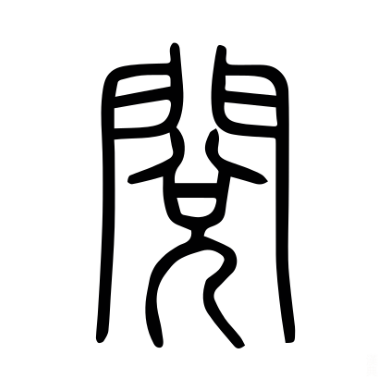

In [9]:
data = np.genfromtxt(os.path.join(data_dir, 'hsk.csv'), delimiter=',', encoding='utf8', dtype=None)
char_array = data[char_from-1:char_to]
print(f"Imported {char_array.shape[0]} characters from index {char_from} to {char_to}")
print(char_array)

if not os.path.exists(os.path.join(data_dir, log)):
    log = open(os.path.join(data_dir, log), 'x', encoding='utf8')

# Get the image url from the site for given character
def scrape_image(url, char, index):
    url_list = []
    page = requests.get(url)
    soup = BeautifulSoup(page.content, "html.parser")
    results = soup.find_all("img", {"class": "lazy kxtimg"})
    for x in results:
        attr = x.attrs['data-original']
        
        # Search for different variants
        if ('swxz' in attr): # or ('swdz' in attr):
            print(attr)
            url_list.append(attr)
    if len(url_list) == 0:
        log_error(f'Char: {index}. Could not locate seal script image - maybe does not exist')
        return None
    
    return url_list

# Website is dynamic so path needs to be manually changed
def recreate_img_path(path):
    inilist = [m.start() for m in re.finditer(r"/", path)]
    try:
        new_path = 'https:' + path[0:inilist[2]+1] + 'swxz' + path[inilist[3]:]
        
        return new_path
    except:
        print('Caught error while changing paths')
        print('HTML structure may have changed (images no longer located in swxz folder or url changed), needs diagnosis')
        
def save_image(url_list, files, index, curr_char_dir):
#       seal_image_url = recreate_img_path(img_path) # Url of image
#           print(f'URL of image: {seal_image_url}')
    curr_image_count = str(int(files[-1][files[-1].index('_')+1:files[-1].index('.')])) if not len(files) == 0 else '1'     
    print(url_list)
    for url in range(len(url_list)):
        img_path = 'https:' + url_list[url]
        new_image_variant_number =  str(int(curr_image_count) + url)
#         data = requests.get(img_path).content # Get svg image

        # Get the filename and full path of the new image of currently scraped character
        new_image_filename = str(index) + '_' + new_image_variant_number
        new_image_path = f'{os.path.join(curr_char_dir, new_image_filename)}.{new_image_filetype}'
        print(f'Filename for new image is: {new_image_filename}')


        # Retrieve SVG file from url obtained from scraping and save SVG file
        svg_filename, headers = urllib.request.urlretrieve(img_path, os.path.join(curr_char_dir, f"{new_image_filename}.svg"))#img_path[img_path.rfind('/')+1:]))
        print(svg_filename)

        with open(svg_filename, "r") as f:
            svg_blob = f.read().encode('utf-8')
            with wand.image.Image( blob=svg_blob, format="svg" ) as image:
                png_image = image.make_blob("png")
                fp = io.BytesIO(png_image)
                with fp:
                    img = mpimg.imread(fp, format='png')
                    plt.imshow(img, cmap='gray')
                    plt.axis('off')
                    plt.savefig(new_image_path)

                    fp.close()
                f.close()
            os.remove(svg_filename)

            print(f'Successfully saved new image at {new_image_filename}')
        time.sleep(3)

def scrape_seal(index, char):
    try:
        print(f"Searching for character {index}: {char}")
        scrape_url = scrape_url_base + char
        print(f"Searching on URL {scrape_url}")

        curr_char_dir = os.path.join(data_dir, str(index))
        files = os.listdir(curr_char_dir)
        files = [f for f in files if os.path.isfile(curr_char_dir+'/'+f)]

        url_list = scrape_image(scrape_url, char, index)

        # Save each image of the character
        if url_list != None:
            print(f'Found {len(url_list)} images for character')
    #             print(url_list)
            save_image(url_list, files, index, curr_char_dir)
    
    except:
        e = sys.exc_info()[0]
        msg = f'Failed to obtain char {index}, with error: {e}'
        log_error(msg)
        

if retry:
#     missed_chars = get_missed_chars()
#     print(missed_chars)
    pass
for char in range(char_array.shape[0]):
    # Get index and character symbol from batch array
    curr_index = char_array[char][0]
    curr_char = char_array[char][1]
    if retry:
         if str(curr_index) in missed_chars:
            print(curr_index)
            scrape_seal(curr_index, curr_char)
    else:
        scrape_seal(curr_index, curr_char)
    

    
        


In [24]:
url = 'https://www.zdic.net/hans/高'
page = requests.get(url)
soup = BeautifulSoup(page.content, "html.parser")
results = soup.find_all("img", {"class": "lazy kxtimg"})
for x in results:
    print(x)
    attr = x.attrs['data-original']
    print()
    if ('swxz' in attr) or ('swdz' in attr):
        print("FOUND IT")



<img class="lazy kxtimg" data-original="//img.zdic.net/kxzd/9AD8.svg"/>

<img class="lazy kxtimg" data-original="//img.zdic.net/swxz/9AD8.svg"/>

FOUND IT
<img class="lazy kxtimg" data-original="//img.zdic.net/xz/swdz/9AD8_7826.svg"><span class="swbf">(高)</span><span class="ywyy">崇也。</span><span class="swdz">山部曰。崇、嵬高也。</span><span class="ywyy">象臺觀高之形。</span><span class="swdz">謂？也。</span><span class="ywyy">从冂囗。</span><span class="swdz">上音莫狄切。下音圍。</span><span class="ywyy">與倉舍同意。</span><span class="swdz">倉舍皆从囗。象築也。？與屮皆象高。古牢切。二部。</span><span class="ywyy">凡高之屬皆从高。</span><span class="xh"></span></img>

FOUND IT


['252', '253', '254', '255', '271', '272', '273', '274', '275', '276', '277', '278', '279', '280', '281', '282', '283', '284', '285', '286', '287', '288', '289', '290', '291', '292', '293', '294', '295', '296', '297', '298', '299', '300', '301', '302', '303', '304', '305', '306', '307', '308', '309', '310', '311', '312', '313', '314', '315', '316', '317', '318', '319', '320', '321', '322', '323', '324', '325', '326', '327', '328', '329', '330', '331', '332', '333', '334', '335', '336', '337', '338', '339', '340', '341', '342', '343', '344', '345', '346', '347', '348', '349', '350', '351', '352', '353', '354', '355', '356', '357', '358', '359', '360', '361', '362', '363', '364', '365', '366', '367', '368', '369', '370', '371', '372', '373', '374', '375', '376', '377', '378', '379', '385', '386', '397', '413', '414', '415', '416', '417', '418', '419', '420', '421', '422', '423', '424', '425', '426', '427', '428', '429', '430', '431', '432', '433', '434', '435', '436', '437', '438', '439'

Error accessing https://img.zdic.net/swxz/5BB6.svg found at https://www.zdic.net/hans/家
